In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
from pklshop.data import *
from pklshop.stats import *
from pklshop.game import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's see what insight we can glean from a single game. 

In [74]:
g = Game("G1")

In [75]:
g.summarize_game()

Anna Leigh Waters & Leigh Waters beat Jesse Irvine & Catherine Parenteau 12-10 in game G1
                Player  Error %  Winner %
0         Jesse Irvine    17.46      9.52
1  Catherine Parenteau     1.59      0.00
2    Anna Leigh Waters     1.59      3.17
3         Leigh Waters     9.52      4.76


In [76]:
def momentum(g: Game):
    """
    Returns the "momentum" for a given game. Defined as net number of rallies won.
    """

    w_team_by_rally = g.rally.sort_values(by='rally_nbr').w_team_id.values
    net = 0
    momentum = np.zeros(len(w_team_by_rally))
    for i, team_id in enumerate(w_team_by_rally):
        if team_id == g.w_team_id:
            net += 1
            momentum[i] = net
        elif team_id == g.l_team_id:
            net -= 1
            momentum[i] = net
        else:
            pass
    return momentum
    

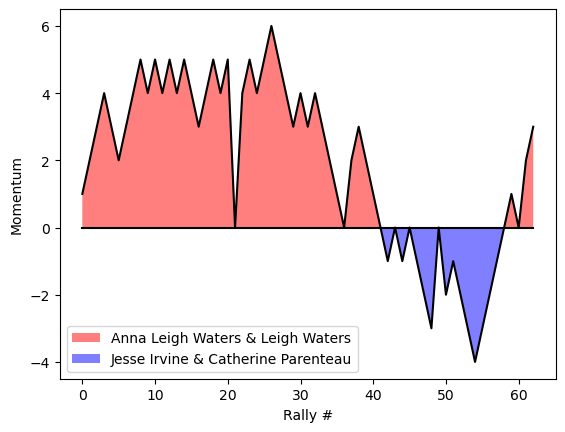

In [77]:
x = np.arange(0, len(momentum(g)))
y = momentum(g)

ax = sns.lineplot(x = [x[0], x[-1]], y = [0, 0], color = 'black')
sns.lineplot(ax = ax, x=x, y=y, color='black')

ypositive=y>=0
ynegative=y<=0

ax.fill_between(x, y, where=ypositive, facecolor = 'red', alpha = 0.5, label = g.w_team_name )
ax.fill_between(x, y, where=ynegative, facecolor = 'blue', alpha = 0.5, label = g.l_team_name )

plt.xlabel('Rally #')
plt.ylabel('Momentum')

plt.legend()

plt.show()